In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
allergy_df=pd.read_csv('data300k.csv')

In [216]:
allergy_df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [266]:
total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_age_start=allergy_df[(allergy_df['AGE_START_YEARS']<=0)==False].min()['AGE_START_YEARS']
latest_allergy_test_age_start=allergy_df[(allergy_df['AGE_START_YEARS']<=0)==False].max()['AGE_START_YEARS']
ages_under_0_count=allergy_df[allergy_df['AGE_START_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_START_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_START_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_START_YEARS']>18].count()['SUBJECT_ID']
ages_error_count=allergy_df[allergy_df['AGE_START_YEARS'] >= allergy_df['AGE_END_YEARS']].count()['SUBJECT_ID']



 #df[df.isnull().sum(axis=1) < 7]
#df= allergy_df[allergy_df.isnull().sum(axis=0)==2]
#print(df)

print(f'\n Total Number of Rows   : {totoal_rows}\n',
      f'\n Earliest Age Testing Start  : {earliest_allergy_test_age_start}\n'
      f'\n Latest Age Testing  Start    : {latest_allergy_test_age_start}\n'
      f'\n Number of AGE_START_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_START_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_START_YEARS > 10  : {ages_under_10_count}\n',
      f'Number of AGE_START_YEARS < 16  : {ages_under_16_count}\n',
      f'Number of AGE_START_YEARS <= AGE_END_YEARS  : {ages_error_count}\n')



 Total Number of Rows   : 333200
 
 Earliest Age Testing Start  : 0.002737851

 Latest Age Testing  Start    : 17.98494182

 Number of AGE_START_YEARS < 0   : 25
 Number of AGE_START_YEARS = 0   : 338
 Number of AGE_START_YEARS > 10  : 283391
 Number of AGE_START_YEARS < 16  : 0
 Number of AGE_START_YEARS <= AGE_END_YEARS  : 0



In [270]:
total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_age_end=allergy_df[(allergy_df['AGE_END_YEARS']<=0)==False].min()['AGE_END_YEARS']
latest_allergy_test_age_end=allergy_df[(allergy_df['AGE_END_YEARS']<=0)==False].max()['AGE_END_YEARS']
ages_under_0_count=allergy_df[allergy_df['AGE_END_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_END_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_END_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_END_YEARS']>18].count()['SUBJECT_ID']




 #df[df.isnull().sum(axis=1) < 7]
#df= allergy_df[allergy_df.isnull().sum(axis=0)==2]
#print(df)

print(f'\n Total Number of Rows   : {totoal_rows}\n',
      f'\n Earliest Age Testing End    : {earliest_allergy_test_age_end}\n'
      f'\n Latest Age Testing End      : {latest_allergy_test_age_end}\n'
      f'\n Number of AGE_END_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_END_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_END_YEARS > 10  : {ages_under_10_count}\n',
      f'Number of AGE_END_YEARS < 16  : {ages_under_16_count}\n')



 Total Number of Rows   : 333200
 
 Earliest Age Testing End    : 1.002053388

 Latest Age Testing End      : 18.99794661

 Number of AGE_END_YEARS < 0   : 0
 Number of AGE_END_YEARS = 0   : 0
 Number of AGE_END_YEARS > 10  : 163201
 Number of AGE_END_YEARS < 16  : 38440



In [298]:
test_duration=allergy_df['AGE_END_YEARS']-allergy_df['AGE_START_YEARS']
start_age_missing=len(allergy_df[allergy_df['AGE_START_YEARS'].isna()==True])
end_age_missing=len(allergy_df[allergy_df['AGE_END_YEARS'].isna()==True])

test_duration_df=test_duration.describe().to_frame()
test_duration_df.columns=['Test Duration Summary']
print(f' Start AGE Missing :  {start_age_missing}\n',   
      f'End AGE Missing :  {end_age_missing}\n')

    

test_duration_df

 Start AGE Missing :  0
 End AGE Missing :  0



,Test Duration Summary
count,333200.000000
mean,6.394514
std,3.391921
min,1.002053
25%,3.427789
50%,6.157426
75%,9.212868
max,12.982888


In [ ]:
total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_year=allergy_df.min()['BIRTH_YEAR']
latest_allergy_test_year=allergy_df.max()['BIRTH_YEAR']
ages_under_0_count=allergy_df[allergy_df['AGE_START_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_START_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_START_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_START_YEARS']>18].count()['SUBJECT_ID']
ages_error_count=allergy_df[allergy_df['AGE_START_YEARS'] >= allergy_df['AGE_END_YEARS']].count()['SUBJECT_ID']



 #df[df.isnull().sum(axis=1) < 7]
#df= allergy_df[allergy_df.isnull().sum(axis=0)==2]
#print(df)

print(f'\n Total Number of Rows   : {totoal_rows}\n',
      f'\n Earliest Age Testing Start  : {earliest_allergy_test_age_start}\n'
      f'\n Latest Age Testing  Start    : {latest_allergy_test_age_start}\n'
      f'\n Number of AGE_START_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_START_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_START_YEARS > 10  : {ages_under_10_count}\n',
      f'Number of AGE_START_YEARS < 16  : {ages_under_16_count}\n',
      f'Number of AGE_START_YEARS <= AGE_END_YEARS  : {ages_error_count}\n')


<AxesSubplot: >

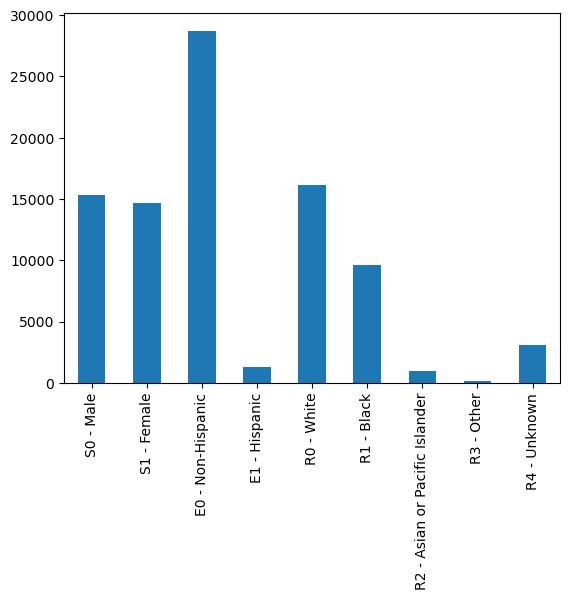

In [180]:
pd.concat([allergy_df.groupby('GENDER_FACTOR').count(),
          allergy_df.groupby('ETHNICITY_FACTOR').count(),
          allergy_df.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")

In [299]:
def clean_DataFrame(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    
    return allergen_df_clean


In [318]:
peanut_df_clean=clean_DataFrame('peanut')

nan_count=len(peanut_df_clean[peanut_df_clean['PEANUT_ALG_END'].isna()==True])

peanut_df_clean.fillna(0.0,inplace=True)
print (f'\n{nan_count} number of NAs in the PEANUT_ALG_END column filled with zeros.\n')
peanut_df_clean.head()


6561 number of NAs in PEANUT_ALG_END column filled with zeros.



,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,PEANUT_ALG_START,PEANUT_ALG_END
0,9,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.726899,1.221081,1.221081
1,66,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.008214,6.792608,2.521561,0.000000
2,88,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.147844,5.681040,2.313484,2.313484
3,163,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.885695,1.733060,0.000000
4,164,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.013689,6.872005,5.587953,0.000000


In [397]:
soy_year_summary=soy_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
soy_year_summary.columns=['','Soy Year Summary']

peanut_year_summary=peanut_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
peanut_year_summary.columns=['','Peanut Year Summary']


pd.merge(peanut_year_summary,soy_year_summary,on='')

,,Peanut Year Summary,Soy Year Summary
0,count,8653.000000,2419.000000
1,mean,2003.037559,2004.406366
2,std,5.426161,5.258163
3,min,1985.000000,1985.000000
4,25%,2000.000000,2002.000000
5,50%,2004.000000,2005.000000
6,75%,2007.000000,2008.000000
7,max,2012.000000,2012.000000


In [320]:
soy_df_clean=clean_DataFrame('soy')

nan_count=len(soy_df_clean[soy_df_clean['SOY_ALG_END'].isna()==True])

soy_df_clean.fillna(0.0,inplace=True)
print (f'\n{nan_count} number of NAs in the SOY_ALG_END column filled with zeros.\n')
soy_df_clean.head()


988 number of NAs in the SOY_ALG_END column filled with zeros.



,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SOY_ALG_START,SOY_ALG_END
0,59,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.002738,5.875428,4.358658,0.000000
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.421629,5.133470,0.544832,0.544832
2,111,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.145106,6.781656,0.106776,0.106776
3,161,2006,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,6.611910,6.428474,0.000000
4,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.016427,6.855578,0.334018,0.334018


Text(0.5, 1.0, 'All Ages')

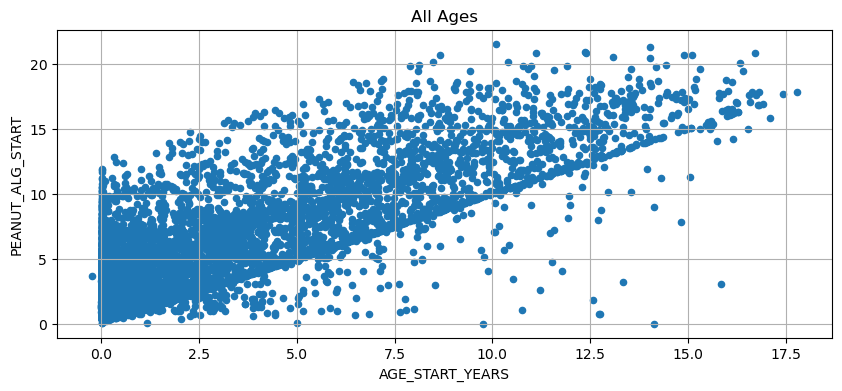

In [349]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.title('All Ages')

Text(0.5, 1.0, 'Under One Year Old')

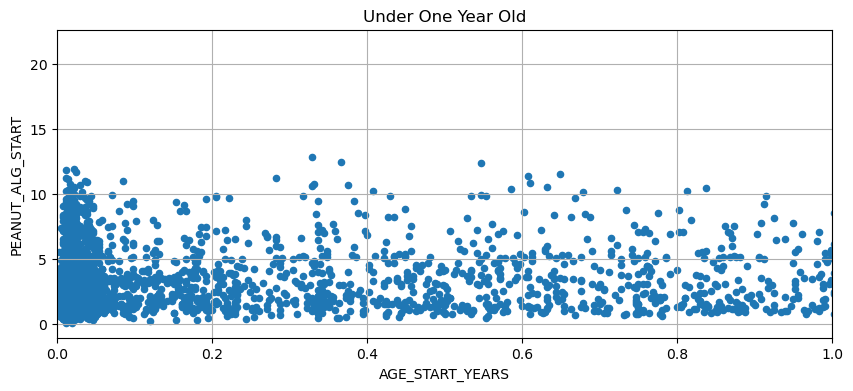

In [350]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.xlim(0,1)
plt.title('Under One Year Old')


C:\Users\sara_\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(0.0, 18.0)

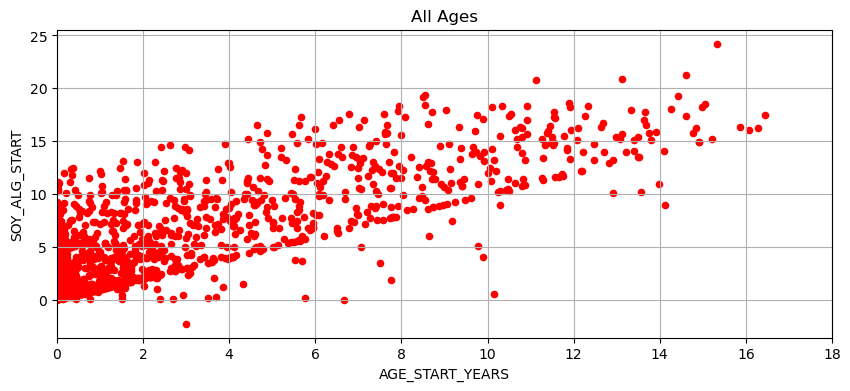

In [343]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.title('All Ages')
plt.xlim(0,18)

Text(0.5, 1.0, 'Under One Year Old')

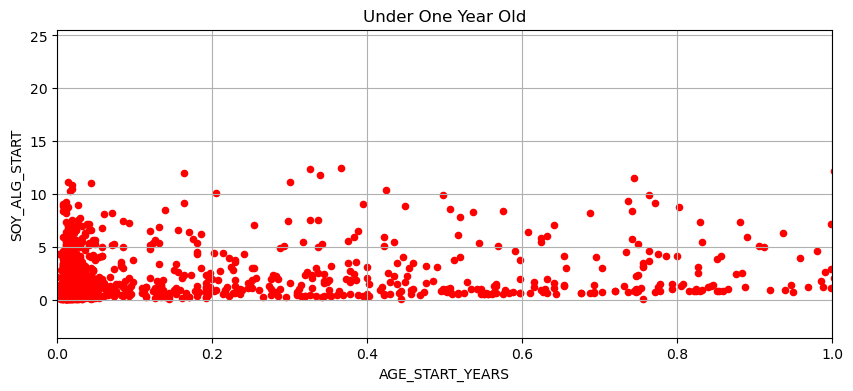

In [339]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.xlim(0,1)
plt.title('Under One Year Old')

Text(0.5, 1.0, 'Peanut')

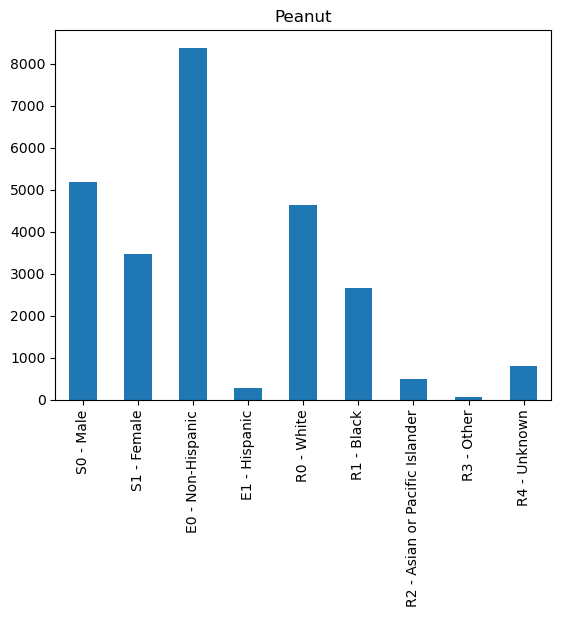

In [399]:
pd.concat([peanut_df_clean.groupby('GENDER_FACTOR').count(),
          peanut_df_clean.groupby('ETHNICITY_FACTOR').count(),
          peanut_df_clean.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")
plt.title('Peanut')

Text(0.5, 1.0, 'Soy')

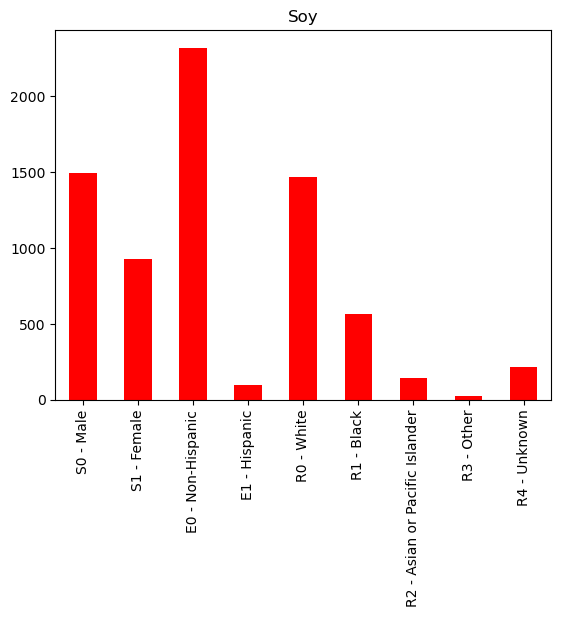

In [401]:
pd.concat([soy_df_clean.groupby('GENDER_FACTOR').count(),
          soy_df_clean.groupby('ETHNICITY_FACTOR').count(),
          soy_df_clean.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar",color='red')
plt.title('Soy')